# **Plot Results**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## C++ & Threads

### Execution Time (Sequential)

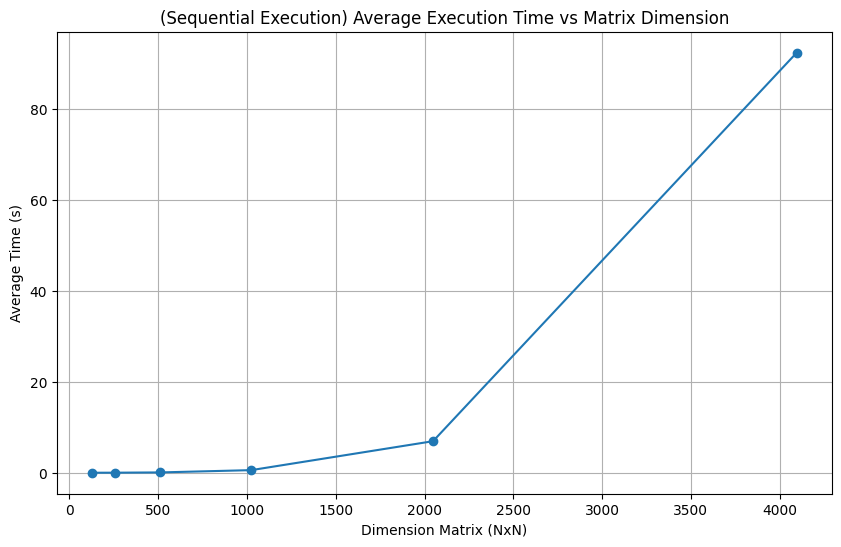

In [ ]:
# Read csv
results_seq = pd.read_csv('results_UTW.csv', names=['N', 'T', 'mode', 'time'])
# Mean of result for each group of repetiton
results_seq = results_seq.groupby(['N'])['time'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_seq['N'], results_seq['time'], marker='o')
plt.xlabel('Dimension Matrix (NxN)')
plt.ylabel('Average Time (s)')
plt.title('(Sequential Execution) Average Execution Time vs Matrix Dimension')
plt.grid(True)
plt.show()

### Execution Time (Static Dynamic)

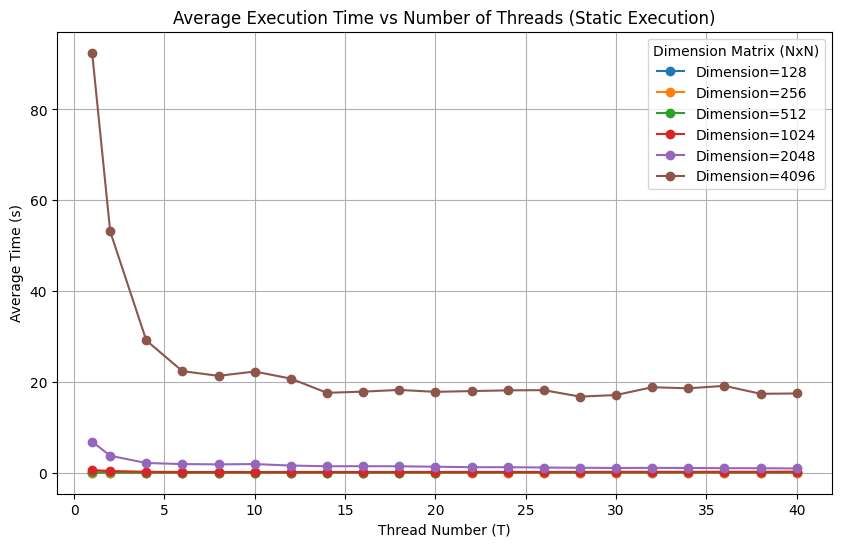

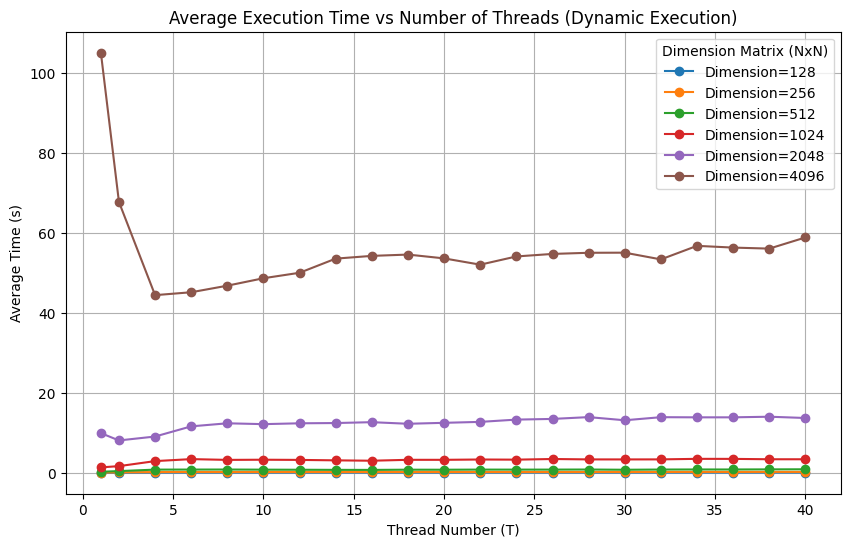

In [ ]:
# Function for plotting executions data
def plot_time_dimension(data, type):
    plt.figure(figsize=(10, 6))

    for N in [128, 256, 512, 1024, 2048, 4096]:
        subset = data[data['N'] == N]
        plt.plot(subset['T'], subset['time'], marker='o', label=f'Dimension={N}')

    plt.xlabel('Thread Number (T)')
    plt.ylabel('Average Time (s)')
    plt.title('Average Execution Time vs Number of Threads (' + type + ' Execution)')
    plt.legend(title='Dimension Matrix (NxN)')
    plt.grid(True)
    plt.show()

# Static
results_static = pd.read_csv('results_UTW_static.csv', names=['N', 'T', 'mode', 'time'])
results_static = results_static.groupby(['N', 'T'])['time'].mean().reset_index()
plot_time_dimension(results_static, 'Static')

# Dynamic
results_dynamic = pd.read_csv('results_UTW_dynamic.csv', names=['N', 'T', 'mode', 'time'])
results_dynamic = results_dynamic.groupby(['N', 'T'])['time'].mean().reset_index()
plot_time_dimension(results_dynamic, 'Dynamic')

### Speedup

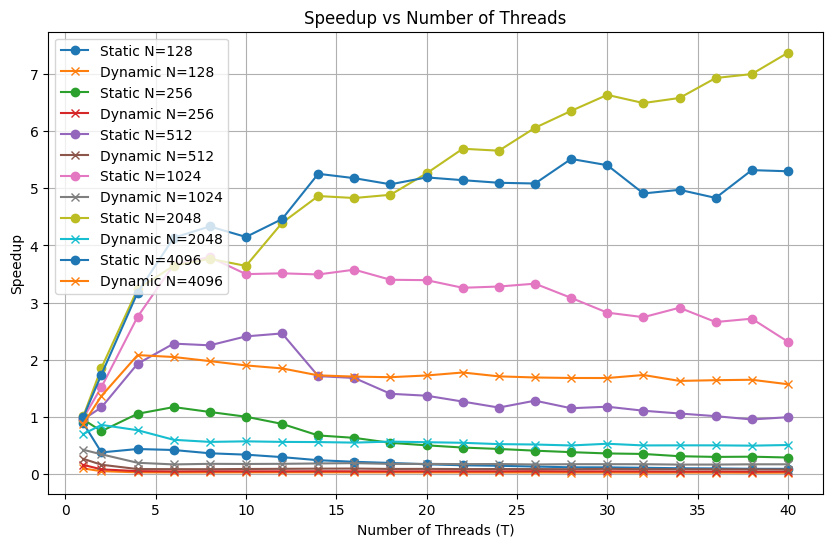

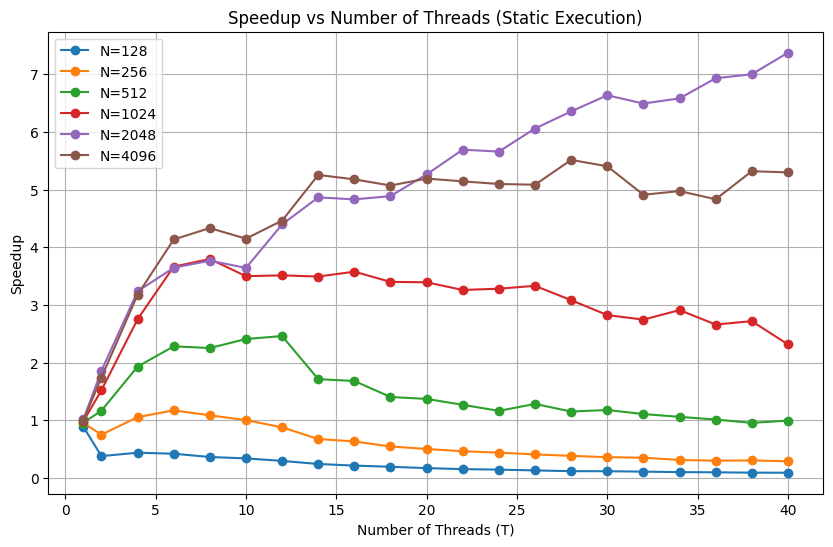

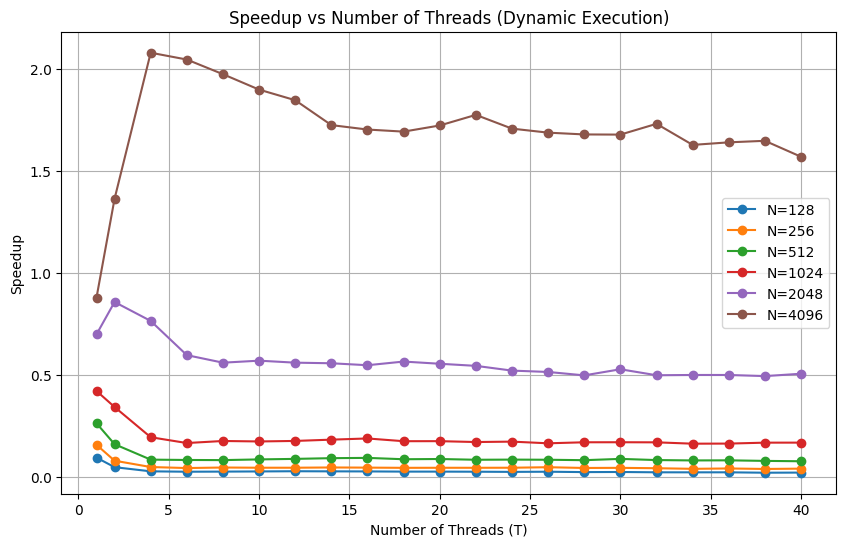

In [ ]:
seq_times = {row['N']: row['time'] for _, row in results_seq.iterrows()}

# Plotting speedup vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
  results_N_static = results_static[results_static['N'] == N]
  results_N_dynamic = results_dynamic[results_dynamic['N'] == N]
  T_values = results_N_static['T'].values
  speedup_static = seq_times[N] / results_N_static['time'].values
  speedup_dynamic = seq_times[N] / results_N_dynamic['time'].values

  plt.plot(T_values, speedup_static, label=f'Static N={N}', marker='o')
  plt.plot(T_values, speedup_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads')
plt.legend()
plt.grid(True)
plt.show()


# Plotting speedup tables separately
def plot_speedup_thread(data, type):
    plt.figure(figsize=(10, 6))
    for N in [128, 256, 512, 1024, 2048, 4096]:
        results_N = data[data['N'] == N]
        T_values = results_N['T'].values
        speedup = seq_times[N] / results_N['time'].values
        plt.plot(T_values, speedup, label=f'N={N}', marker='o')

    plt.xlabel('Number of Threads (T)')
    plt.ylabel('Speedup')
    plt.title('Speedup vs Number of Threads (' + type + ' Execution)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_speedup_thread(results_static, 'Static')
plot_speedup_thread(results_dynamic, 'Dynamic')

### Efficiency

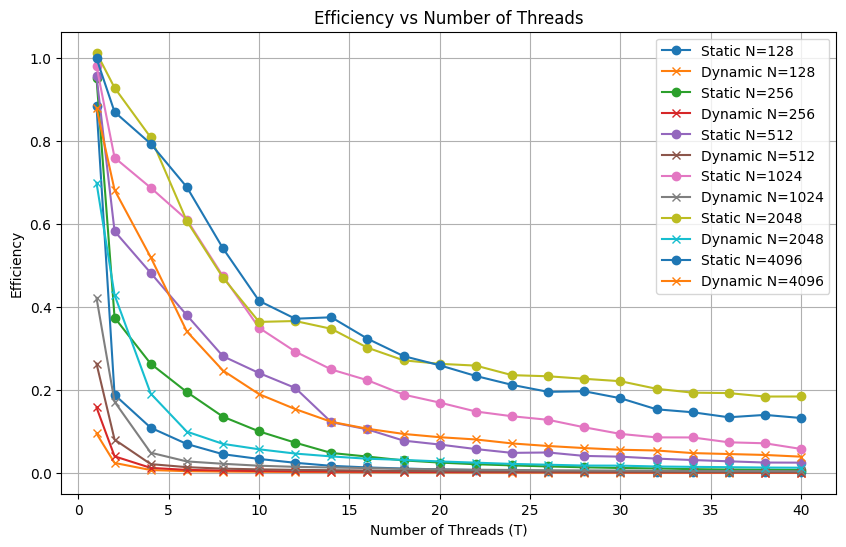

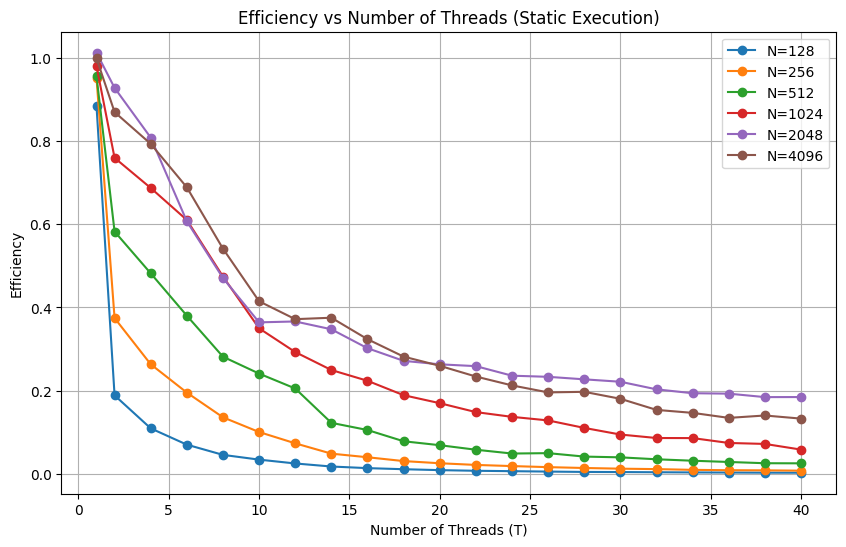

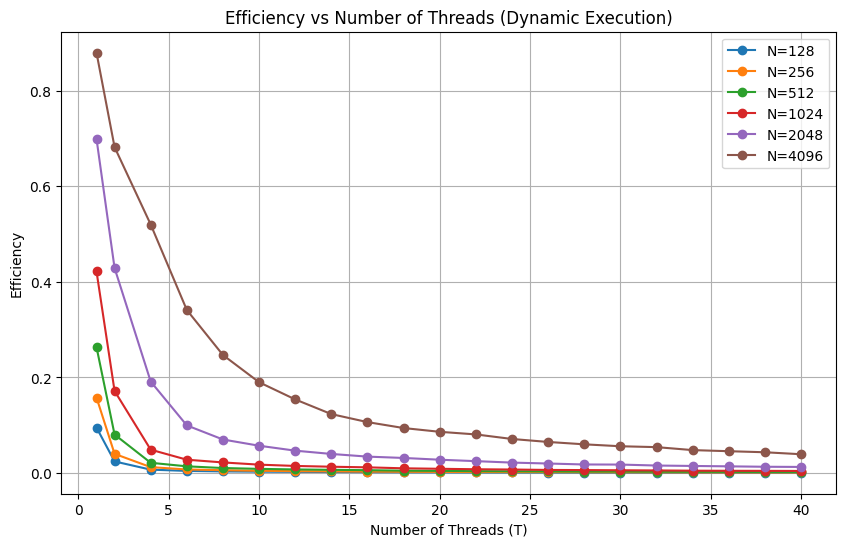

In [ ]:
# Plotting efficiency vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
  results_N_static = results_static[results_static['N'] == N]
  results_N_dynamic = results_dynamic[results_dynamic['N'] == N]
  T_values = results_N_static['T'].values
  efficiency_static = (seq_times[N] / results_N_static['time'].values) / T_values
  efficiency_dynamic = (seq_times[N] / results_N_dynamic['time'].values) / T_values

  plt.plot(T_values, efficiency_static, label=f'Static N={N}', marker='o')
  plt.plot(T_values, efficiency_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Threads')
plt.legend()
plt.grid(True)
plt.show()


# Plotting efficiency tables separately
def plot_efficiency_thread(data, type):
    plt.figure(figsize=(10, 6))
    for N in [128, 256, 512, 1024, 2048, 4096]:
        results_N = data[data['N'] == N]
        T_values = results_N['T'].values
        efficency = (seq_times[N] / results_N['time'].values) / T_values
        plt.plot(T_values, efficency, label=f'N={N}', marker='o')

    plt.xlabel('Number of Threads (T)')
    plt.ylabel('Efficiency')
    plt.title('Efficiency vs Number of Threads (' + type + ' Execution)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_efficiency_thread(results_static, 'Static')
plot_efficiency_thread(results_dynamic, 'Dynamic')

### Strong Scalability

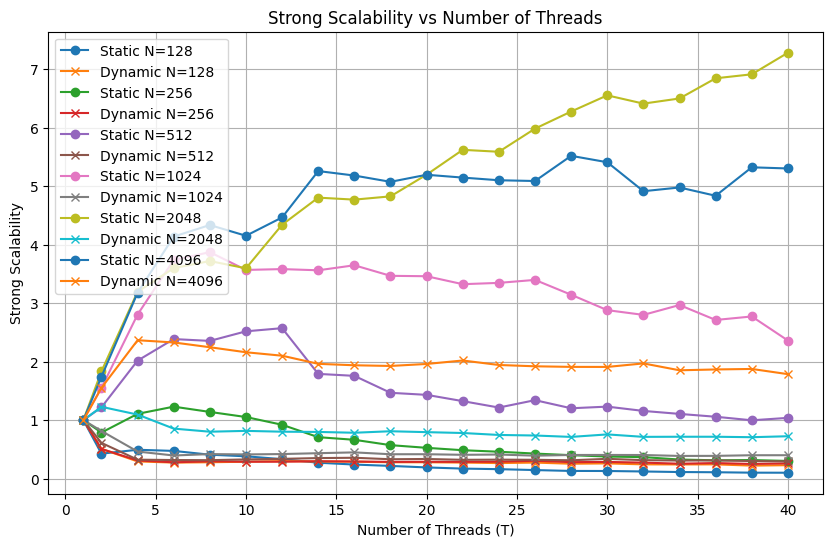

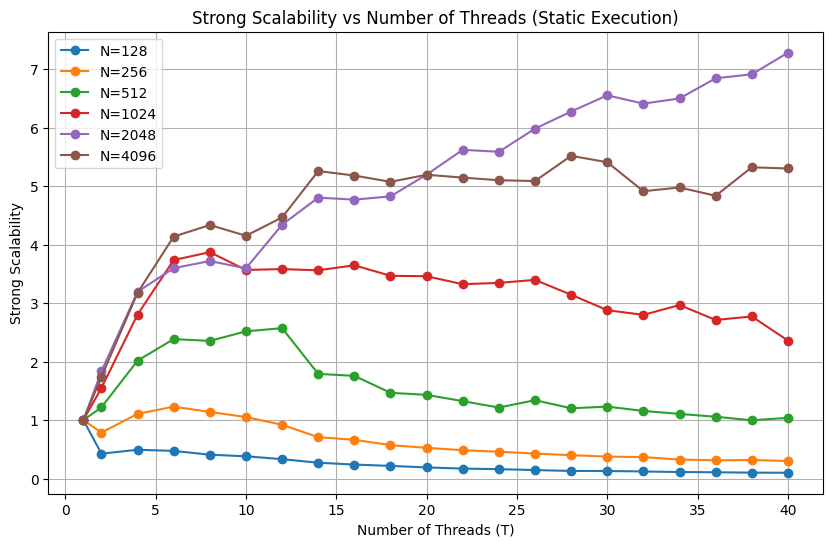

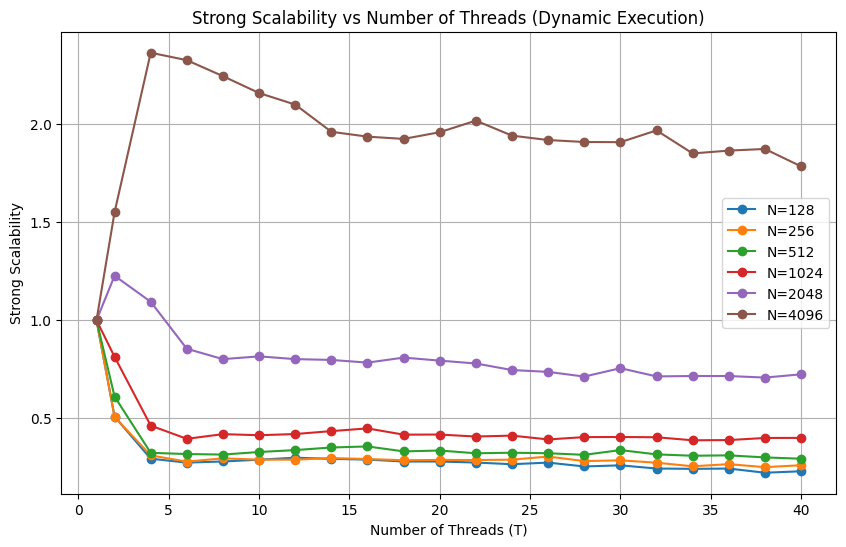

In [ ]:
# Plotting strong scalability vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
    results_N_static = results_static[results_static['N'] == N]
    results_N_dynamic = results_dynamic[results_dynamic['N'] == N]
    T_values = results_N_static['T'].unique()

    T1_static_time = results_N_static[results_N_static['T'] == 1]['time'].values[0]
    T1_dynamic_time = results_N_dynamic[results_N_dynamic['T'] == 1]['time'].values[0]
    scalability_static = T1_static_time / results_N_static['time'].values
    scalability_dynamic = T1_dynamic_time / results_N_dynamic['time'].values

    plt.plot(T_values, scalability_static, label=f'Static N={N}', marker='o')
    plt.plot(T_values, scalability_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Strong Scalability')
plt.title('Strong Scalability vs Number of Threads')
plt.legend()
plt.grid(True)
plt.show()


# Plotting scalability tables separately
def plot_strong_scalability_thread(data, type):
    plt.figure(figsize=(10, 6))
    for N in [128, 256, 512, 1024, 2048, 4096]:
        results_N = data[data['N'] == N]
        T_values = results_N['T'].unique()

        T1_static_time = results_N[results_N['T'] == 1]['time'].values[0]
        scalability = T1_static_time / results_N['time'].values
        plt.plot(T_values, scalability, label=f'N={N}', marker='o')

    plt.xlabel('Number of Threads (T)')
    plt.ylabel('Strong Scalability')
    plt.title('Strong Scalability vs Number of Threads (' + type + ' Execution)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_strong_scalability_thread(results_static, 'Static')
plot_strong_scalability_thread(results_dynamic, 'Dynamic')

### Weak Scalability



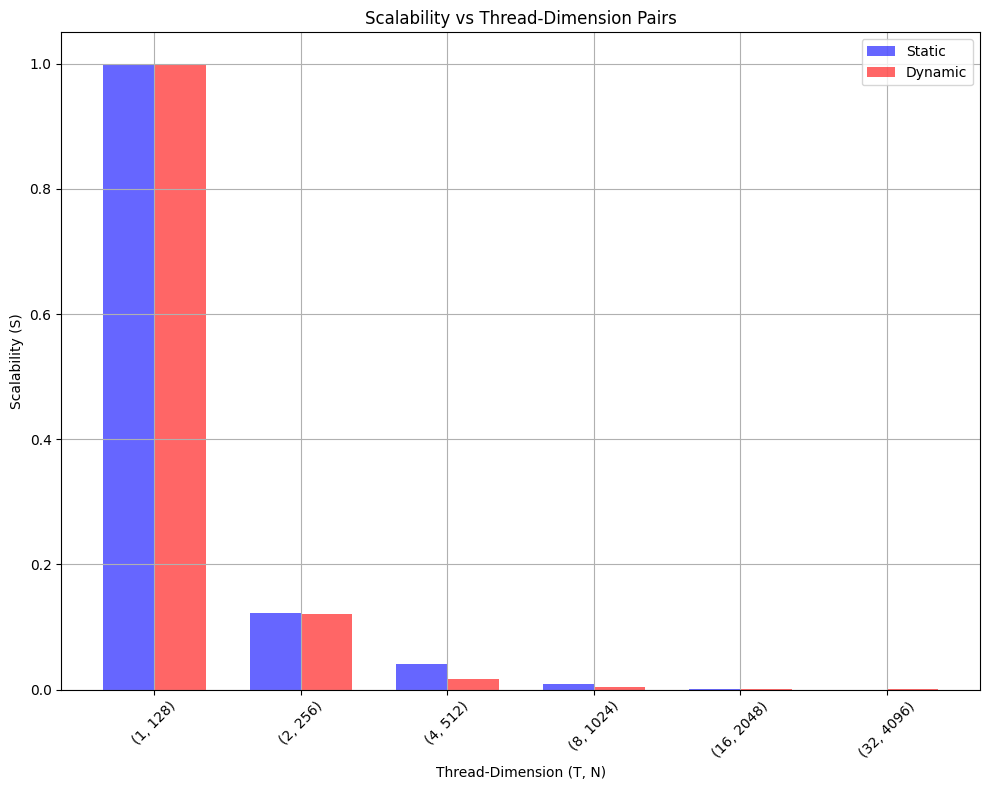

In [ ]:
# Plotting weak scalability vs number of threads for static and dynamic executions

# Define thread values to test
thread_values = [1, 2, 4, 8, 16, 32]
# Base matrix size
base_size = 128

# Lists to store scalability results
scalability_results_static = []
scalability_results_dynamic = []

# Test each thread value
for T in thread_values:
    N_scaled = base_size * T  # Scale matrix size proportionally to the number of threads
    result_static = results_static[(results_static['N'] == N_scaled) & (results_static['T'] == T)]
    result_dynamic = results_dynamic[(results_dynamic['N'] == N_scaled) & (results_dynamic['T'] == T)]

    if not result_static.empty and not result_dynamic.empty:
        T1_static_time = results_static[(results_static['N'] == base_size) & (results_static['T'] == 1)]['time'].values[0]
        T1_dynamic_time = results_dynamic[(results_dynamic['N'] == base_size) & (results_dynamic['T'] == 1)]['time'].values[0]

        scalability_static = T1_static_time / result_static['time'].values[0]
        scalability_dynamic = T1_dynamic_time / result_dynamic['time'].values[0]

        scalability_results_static.append((T, N_scaled, scalability_static))
        scalability_results_dynamic.append((T, N_scaled, scalability_dynamic))

# Extract thread-dimension pairs and scalability values for static and dynamic execution
static_pairs = [f'({T}, {N})' for T, N, S in scalability_results_static]
static_scalability = [S for T, N, S in scalability_results_static]
dynamic_pairs = [f'({T}, {N})' for T, N, S in scalability_results_dynamic]
dynamic_scalability = [S for T, N, S in scalability_results_dynamic]

# Set up the plot
plt.figure(figsize=(10, 8))

# Define the width of each bar and the positions on the x-axis
bar_width = 0.35
index = np.arange(len(static_pairs))

# Plot bars for static scalability
plt.bar(index - bar_width/2, static_scalability, bar_width, color='blue', alpha=0.6, label='Static')

# Plot bars for dynamic scalability
plt.bar(index + bar_width/2, dynamic_scalability, bar_width, color='red', alpha=0.6, label='Dynamic')

plt.xlabel('Thread-Dimension (T, N)')
plt.ylabel('Scalability (S)')
plt.title('Scalability vs Thread-Dimension Pairs')
plt.xticks(index, static_pairs, rotation=45)  # Set x-ticks to be the thread-dimension pairs
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


## FastFlow

### [FF] Execution Time (Static Dynamic)

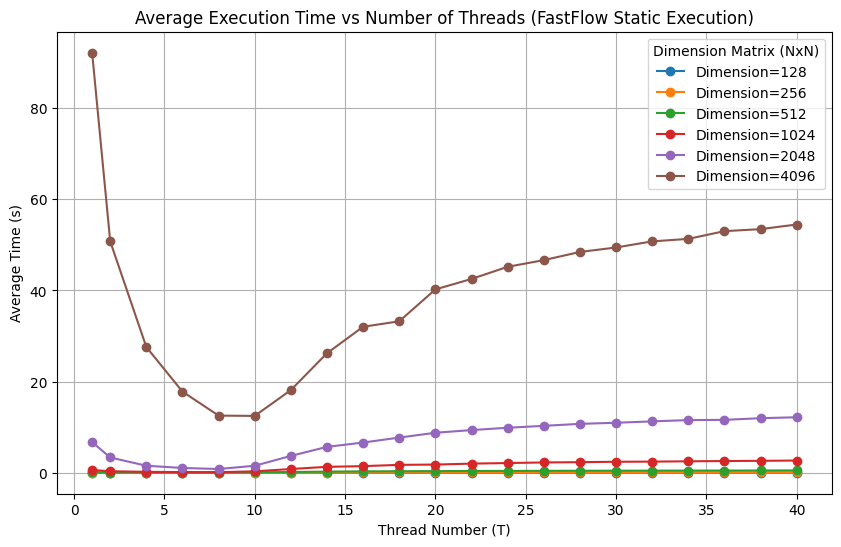

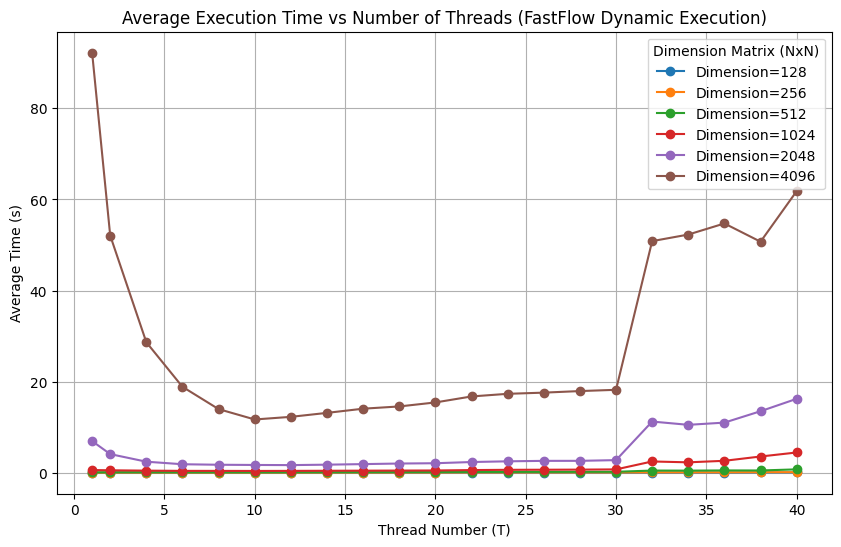

In [ ]:
# Static
results_static_FF = pd.read_csv('results_UTWFF_static.csv', names=['N', 'T', 'mode', 'time'])
results_static_FF = results_static_FF.groupby(['N', 'T'])['time'].mean().reset_index()
plot_time_dimension(results_static_FF, 'FastFlow Static')

# Dynamic
results_dynamic_FF = pd.read_csv('results_UTWFF_dynamic.csv', names=['N', 'T', 'mode', 'time'])
results_dynamic_FF = results_dynamic_FF.groupby(['N', 'T'])['time'].mean().reset_index()
plot_time_dimension(results_dynamic_FF, 'FastFlow Dynamic')

### [FF] Speedup

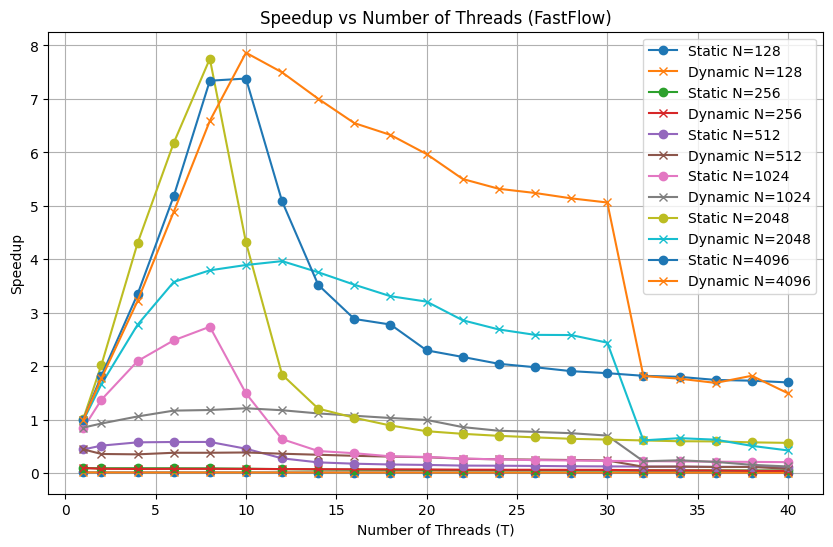

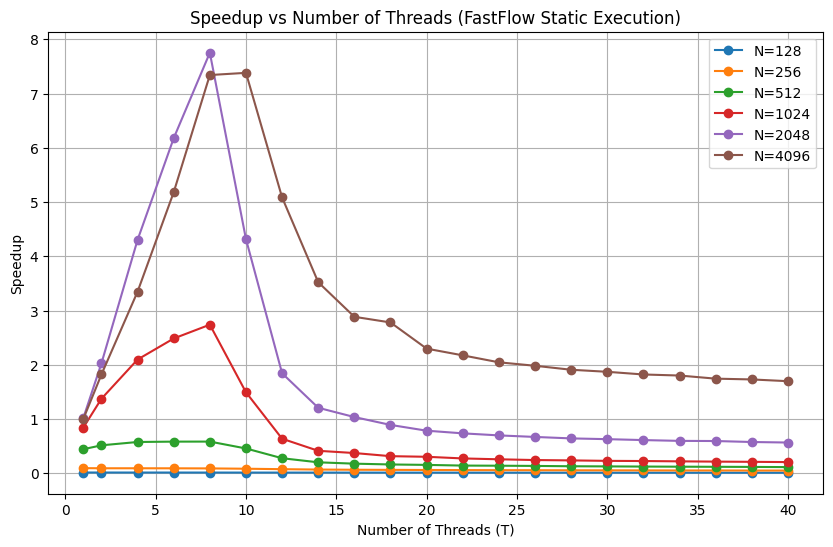

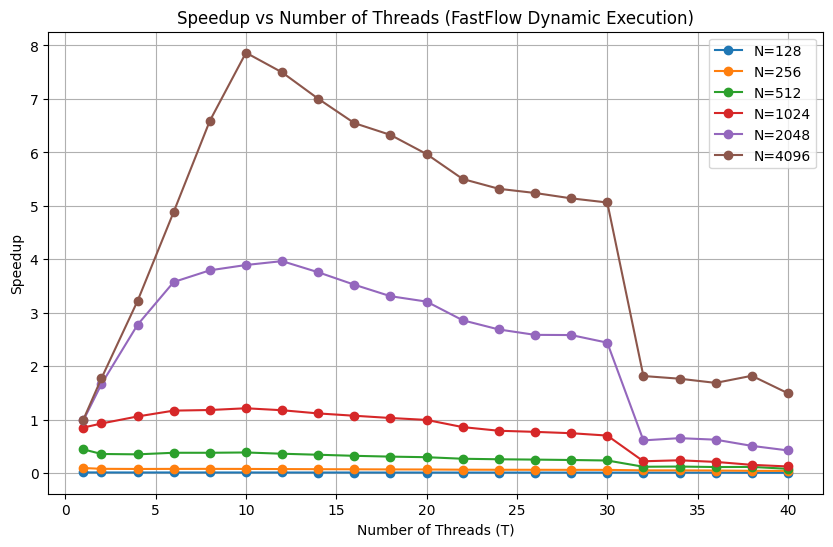

In [ ]:
# Plotting speedup vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
  results_N_static = results_static_FF[results_static_FF['N'] == N]
  results_N_dynamic = results_dynamic_FF[results_dynamic_FF['N'] == N]
  T_values = results_N_static['T'].values
  speedup_static = seq_times[N] / results_N_static['time'].values
  speedup_dynamic = seq_times[N] / results_N_dynamic['time'].values

  plt.plot(T_values, speedup_static, label=f'Static N={N}', marker='o')
  plt.plot(T_values, speedup_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads (FastFlow)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting speedup tables separately
plot_speedup_thread(results_static_FF, 'FastFlow Static')
plot_speedup_thread(results_dynamic_FF, 'FastFlow Dynamic')

### [FF] Efficiency

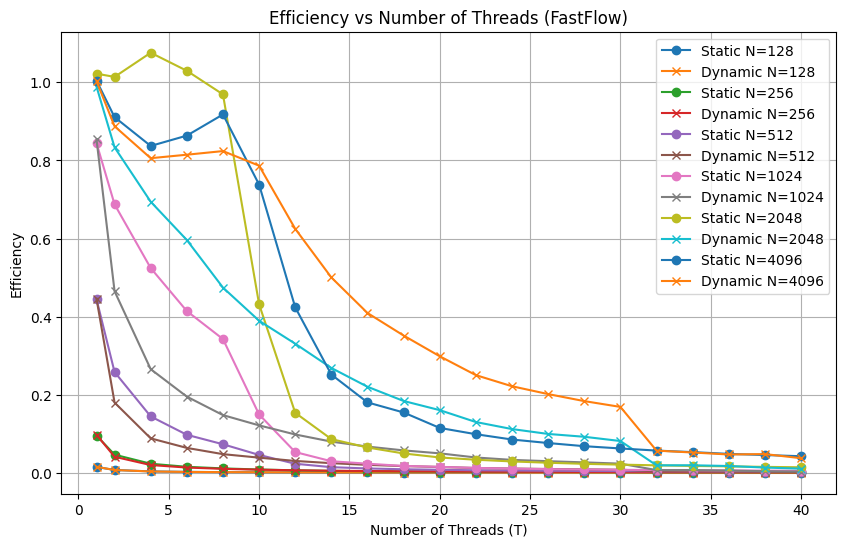

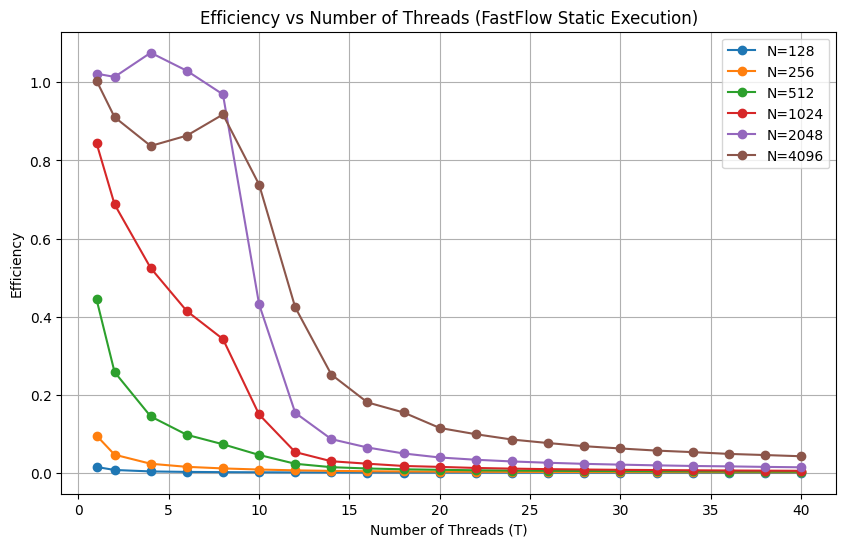

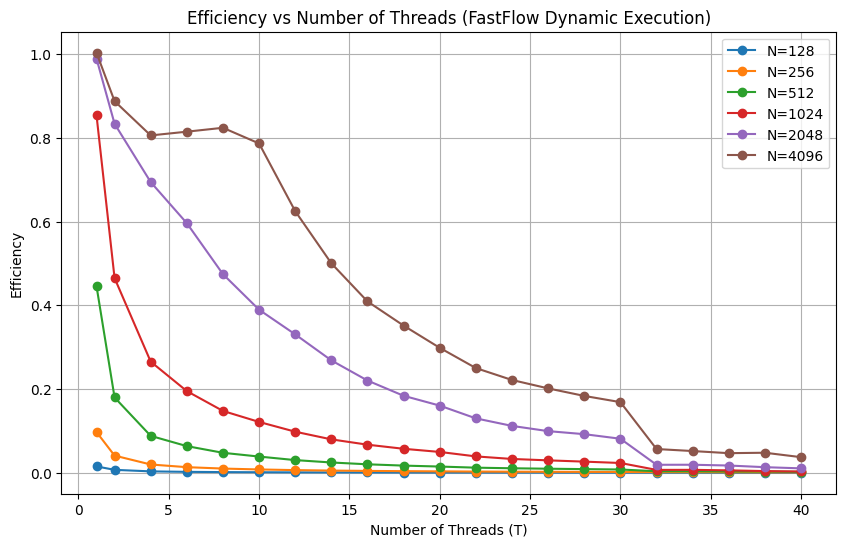

In [ ]:
# Plotting efficency vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
  results_N_static = results_static_FF[results_static_FF['N'] == N]
  results_N_dynamic = results_dynamic_FF[results_dynamic_FF['N'] == N]
  T_values = results_N_static['T'].values
  efficiency_static = (seq_times[N] / results_N_static['time'].values) / T_values
  efficiency_dynamic = (seq_times[N] / results_N_dynamic['time'].values) / T_values

  plt.plot(T_values, efficiency_static, label=f'Static N={N}', marker='o')
  plt.plot(T_values, efficiency_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Threads (FastFlow)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting efficiency tables separately
plot_efficiency_thread(results_static_FF, 'FastFlow Static')
plot_efficiency_thread(results_dynamic_FF, 'FastFlow Dynamic')

### [FF] Strong Scalability

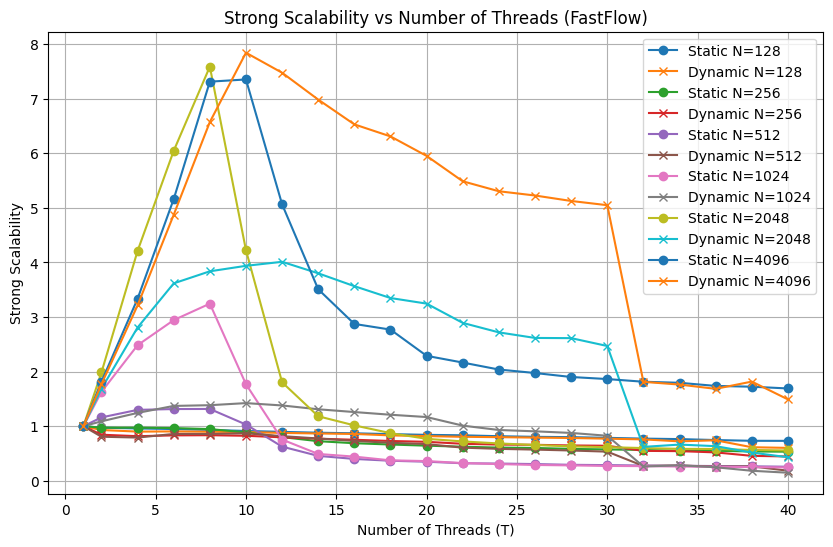

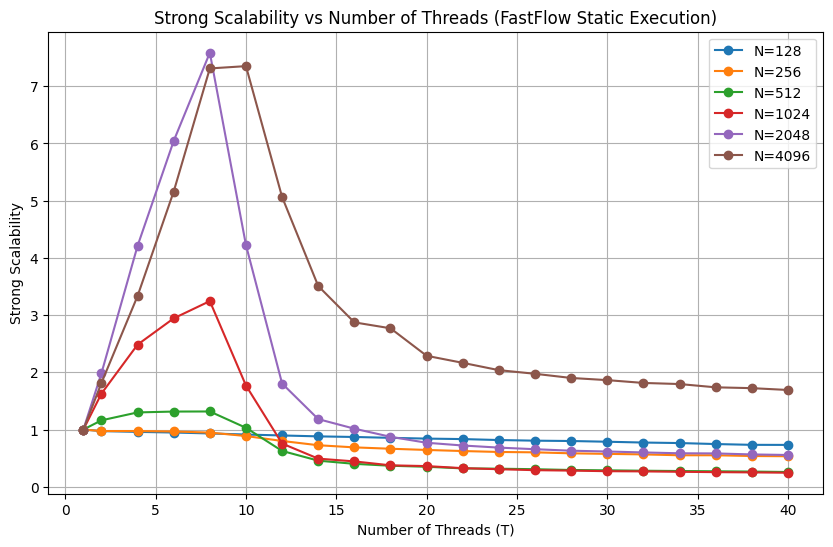

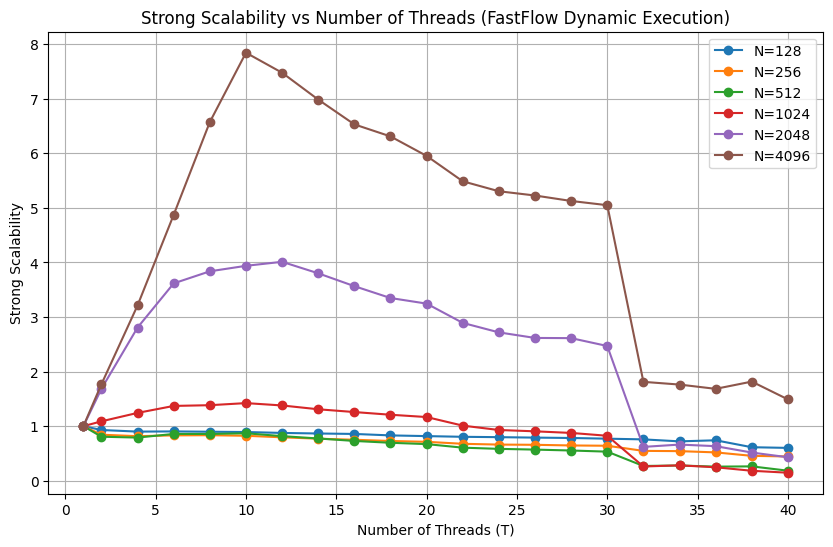

In [ ]:
# Plotting strong scalability vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
    results_N_static = results_static_FF[results_static_FF['N'] == N]
    results_N_dynamic = results_dynamic_FF[results_dynamic_FF['N'] == N]
    T_values = results_N_static['T'].unique()

    T1_static_time = results_N_static[results_N_static['T'] == 1]['time'].values[0]
    T1_dynamic_time = results_N_dynamic[results_N_dynamic['T'] == 1]['time'].values[0]
    scalability_static = T1_static_time / results_N_static['time'].values
    scalability_dynamic = T1_dynamic_time / results_N_dynamic['time'].values

    plt.plot(T_values, scalability_static, label=f'Static N={N}', marker='o')
    plt.plot(T_values, scalability_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Strong Scalability')
plt.title('Strong Scalability vs Number of Threads (FastFlow)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting scalability tables separately
plot_strong_scalability_thread(results_static_FF, 'FastFlow Static')
plot_strong_scalability_thread(results_dynamic_FF, 'FastFlow Dynamic')

### [FF] Weak Scalability

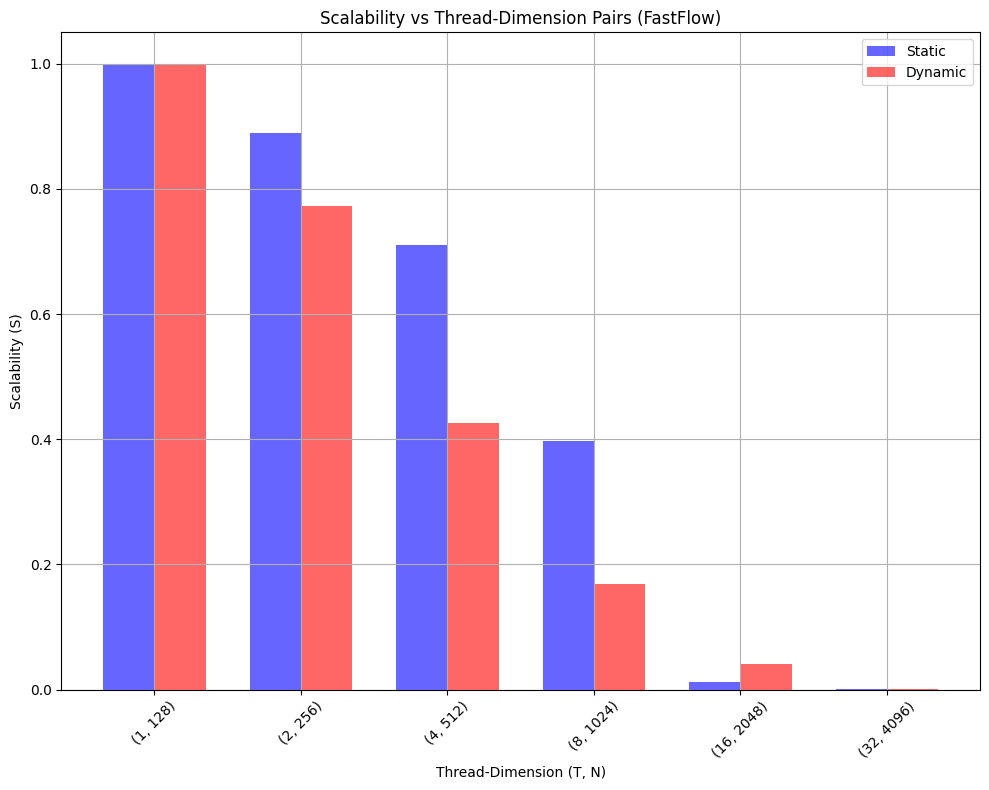

In [ ]:
# Plotting weak scalability vs number of threads for static and dynamic executions

# Define thread values to test
thread_values = [1, 2, 4, 8, 16, 32]
# Base matrix size
base_size = 128

# Lists to store scalability results
scalability_results_static = []
scalability_results_dynamic = []

# Test each thread value
for T in thread_values:
    N_scaled = base_size * T  # Scale matrix size proportionally to the number of threads
    result_static = results_static_FF[(results_static_FF['N'] == N_scaled) & (results_static_FF['T'] == T)]
    result_dynamic = results_dynamic_FF[(results_dynamic_FF['N'] == N_scaled) & (results_dynamic_FF['T'] == T)]

    if not result_static.empty and not result_dynamic.empty:
        T1_static_time = results_static_FF[(results_static_FF['N'] == base_size) & (results_static_FF['T'] == 1)]['time'].values[0]
        T1_dynamic_time = results_dynamic_FF[(results_dynamic_FF['N'] == base_size) & (results_dynamic_FF['T'] == 1)]['time'].values[0]

        scalability_static = T1_static_time / result_static['time'].values[0]
        scalability_dynamic = T1_dynamic_time / result_dynamic['time'].values[0]

        scalability_results_static.append((T, N_scaled, scalability_static))
        scalability_results_dynamic.append((T, N_scaled, scalability_dynamic))

# Extract thread-dimension pairs and scalability values for static and dynamic execution
static_pairs = [f'({T}, {N})' for T, N, S in scalability_results_static]
static_scalability = [S for T, N, S in scalability_results_static]
dynamic_pairs = [f'({T}, {N})' for T, N, S in scalability_results_dynamic]
dynamic_scalability = [S for T, N, S in scalability_results_dynamic]

# Set up the plot
plt.figure(figsize=(10, 8))

# Define the width of each bar and the positions on the x-axis
bar_width = 0.35
index = np.arange(len(static_pairs))

# Plot bars for static scalability
plt.bar(index - bar_width/2, static_scalability, bar_width, color='blue', alpha=0.6, label='Static')

# Plot bars for dynamic scalability
plt.bar(index + bar_width/2, dynamic_scalability, bar_width, color='red', alpha=0.6, label='Dynamic')

plt.xlabel('Thread-Dimension (T, N)')
plt.ylabel('Scalability (S)')
plt.title('Scalability vs Thread-Dimension Pairs (FastFlow)')
plt.xticks(index, static_pairs, rotation=45)  # Set x-ticks to be the thread-dimension pairs
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


## OpenMP

### [OMP] Execution Time (Static Dynamic)

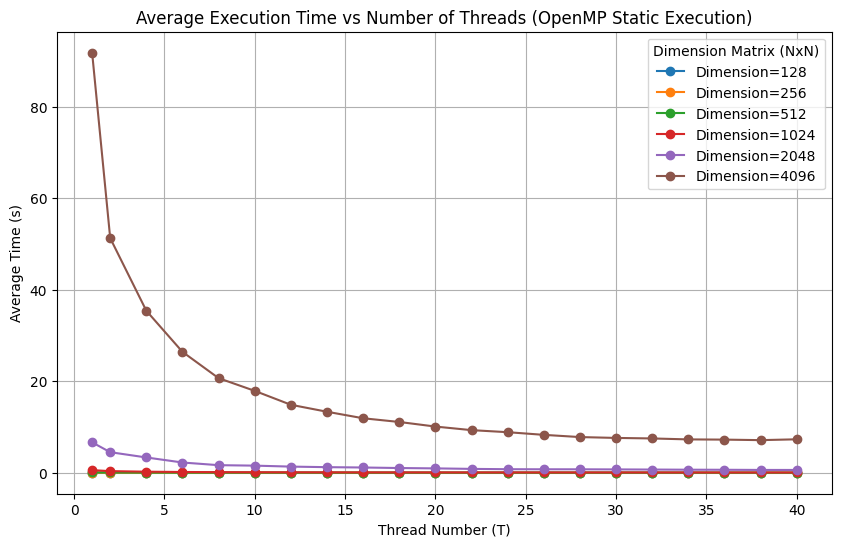

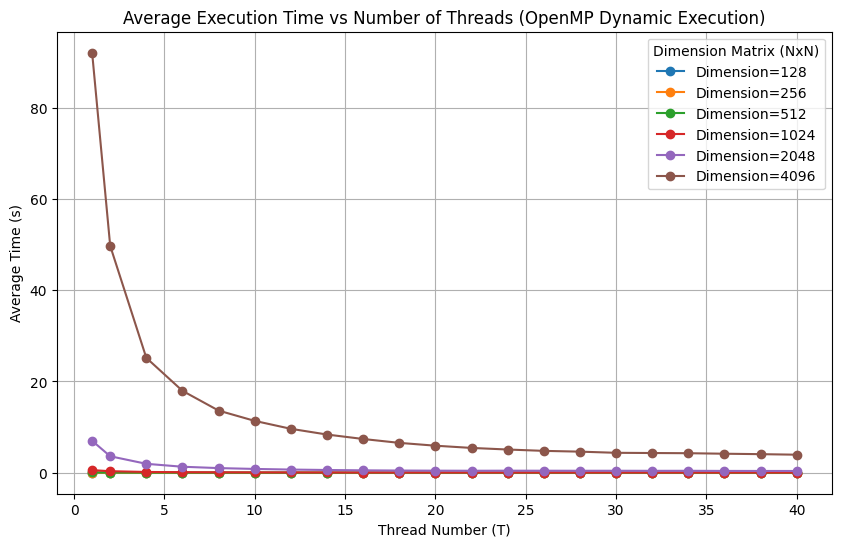

In [ ]:
# Static
results_static_OMP = pd.read_csv('results_UTWOMP_static.csv', names=['N', 'T', 'mode', 'time'])
results_static_OMP = results_static_OMP.groupby(['N', 'T'])['time'].mean().reset_index()
plot_time_dimension(results_static_OMP, 'OpenMP Static')

# Dynamic
results_dynamic_OMP = pd.read_csv('results_UTWOMP_dynamic.csv', names=['N', 'T', 'mode', 'time'])
results_dynamic_OMP = results_dynamic_OMP.groupby(['N', 'T'])['time'].mean().reset_index()
plot_time_dimension(results_dynamic_OMP, 'OpenMP Dynamic')

### [OMP] Speedup

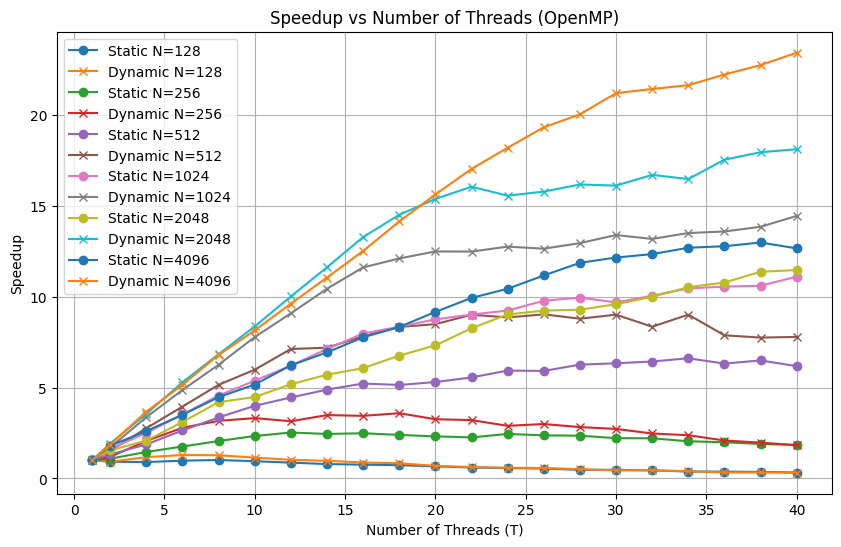

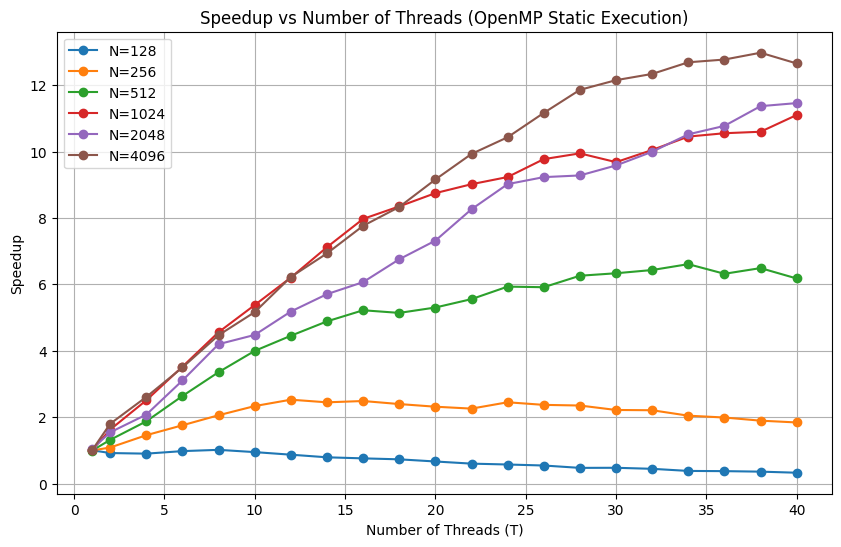

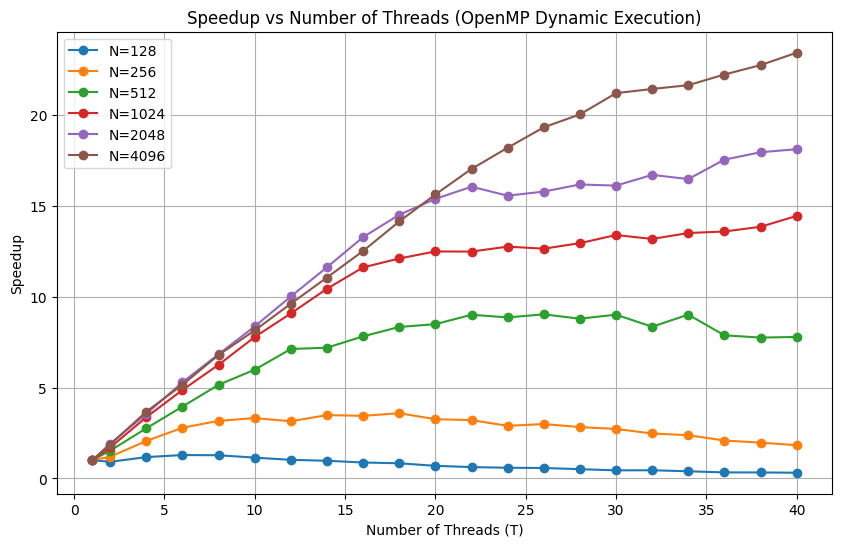

In [ ]:
# Plotting speedup vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
  results_N_static = results_static_OMP[results_static_OMP['N'] == N]
  results_N_dynamic = results_dynamic_OMP[results_dynamic_OMP['N'] == N]
  T_values = results_N_static['T'].values
  speedup_static = seq_times[N] / results_N_static['time'].values
  speedup_dynamic = seq_times[N] / results_N_dynamic['time'].values

  plt.plot(T_values, speedup_static, label=f'Static N={N}', marker='o')
  plt.plot(T_values, speedup_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads (OpenMP)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting speedup tables separately
plot_speedup_thread(results_static_OMP, 'OpenMP Static')
plot_speedup_thread(results_dynamic_OMP, 'OpenMP Dynamic')

### [OMP] Efficency

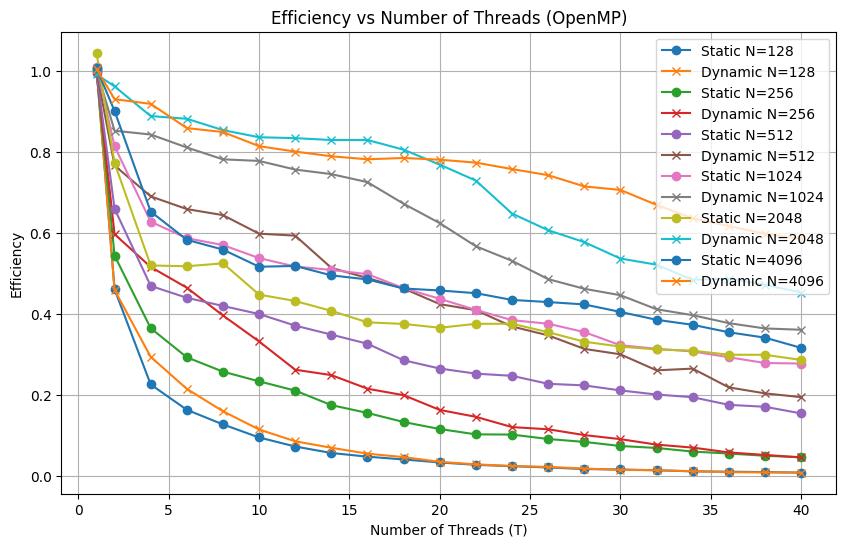

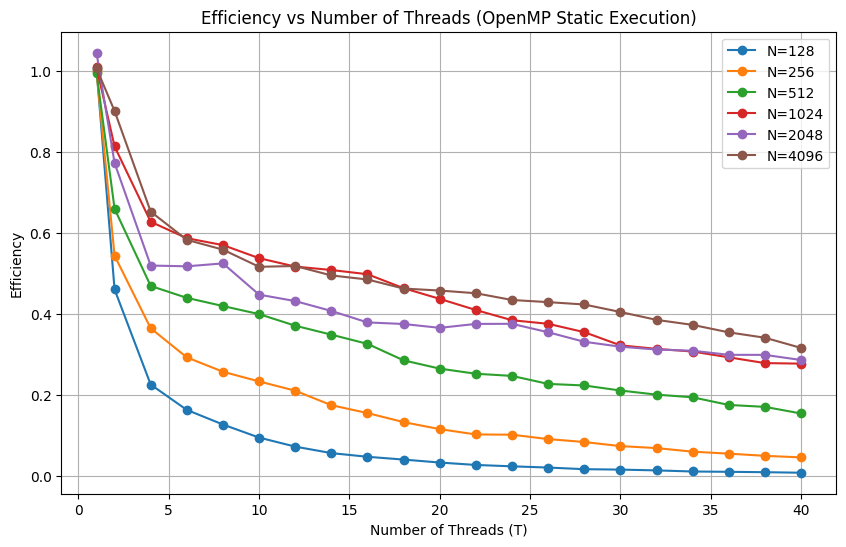

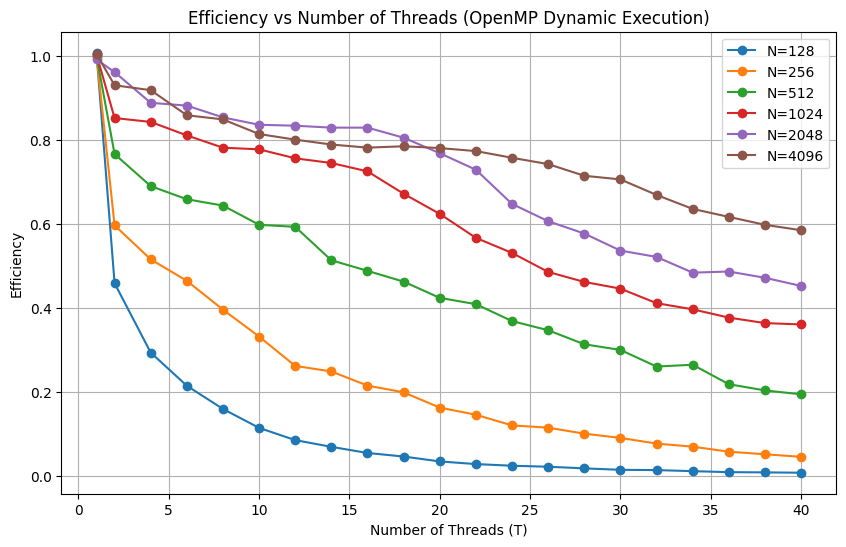

In [ ]:
# Plotting efficency vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
  results_N_static = results_static_OMP[results_static_OMP['N'] == N]
  results_N_dynamic = results_dynamic_OMP[results_dynamic_OMP['N'] == N]
  T_values = results_N_static['T'].values
  efficiency_static = (seq_times[N] / results_N_static['time'].values) / T_values
  efficiency_dynamic = (seq_times[N] / results_N_dynamic['time'].values) / T_values

  plt.plot(T_values, efficiency_static, label=f'Static N={N}', marker='o')
  plt.plot(T_values, efficiency_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Threads (OpenMP)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting efficency tables separately
plot_efficiency_thread(results_static_OMP, 'OpenMP Static')
plot_efficiency_thread(results_dynamic_OMP, 'OpenMP Dynamic')

### [OMP] Strong Scalability

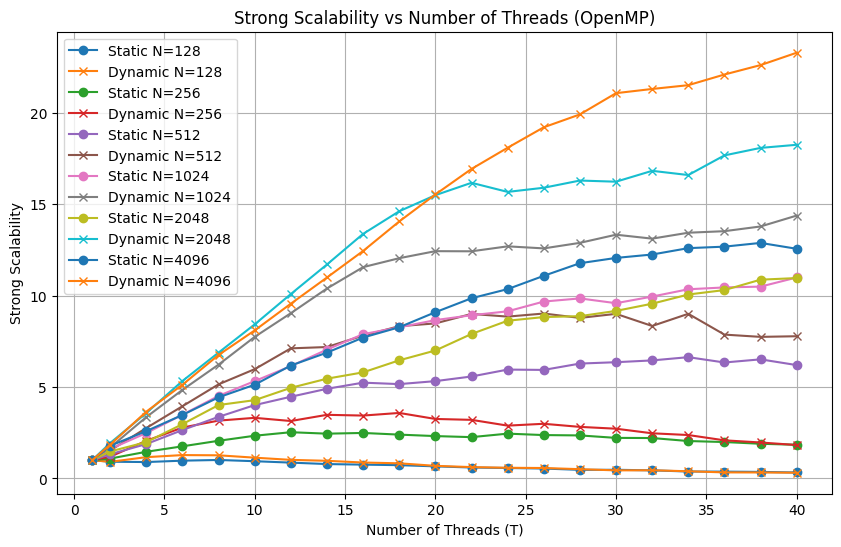

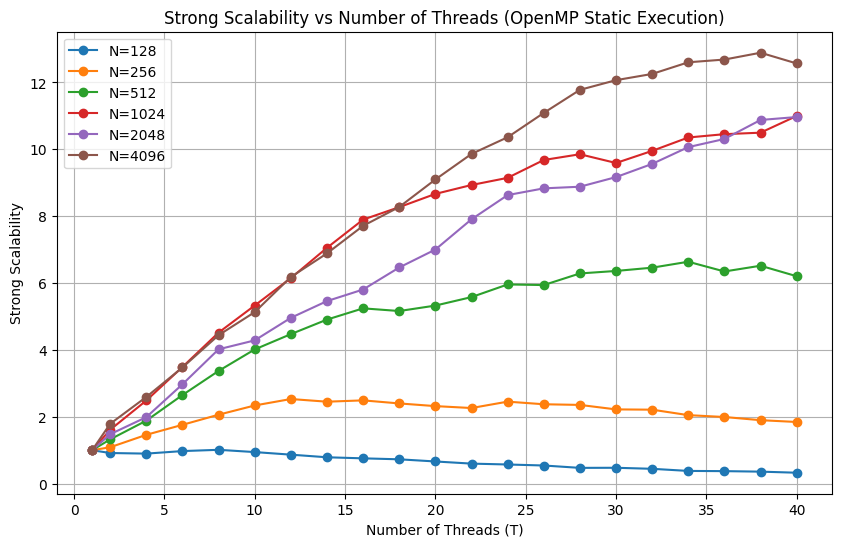

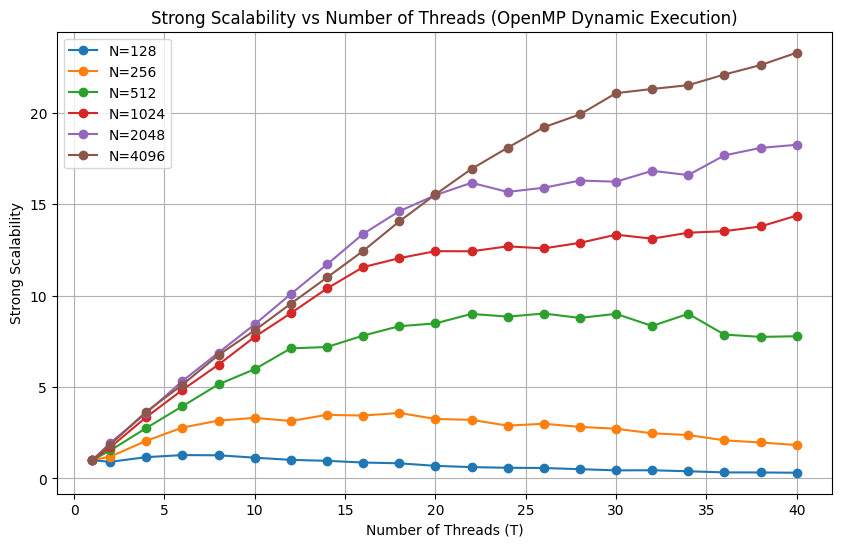

In [ ]:
# Plotting strong scalability vs number of threads for static and dynamic executions
plt.figure(figsize=(10, 6))
for N in [128, 256, 512, 1024, 2048, 4096]:
    results_N_static = results_static_OMP[results_static_OMP['N'] == N]
    results_N_dynamic = results_dynamic_OMP[results_dynamic_OMP['N'] == N]
    T_values = results_N_static['T'].unique()

    T1_static_time = results_N_static[results_N_static['T'] == 1]['time'].values[0]
    T1_dynamic_time = results_N_dynamic[results_N_dynamic['T'] == 1]['time'].values[0]
    scalability_static = T1_static_time / results_N_static['time'].values
    scalability_dynamic = T1_dynamic_time / results_N_dynamic['time'].values

    plt.plot(T_values, scalability_static, label=f'Static N={N}', marker='o')
    plt.plot(T_values, scalability_dynamic, label=f'Dynamic N={N}', marker='x')

plt.xlabel('Number of Threads (T)')
plt.ylabel('Strong Scalability')
plt.title('Strong Scalability vs Number of Threads (OpenMP)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting scalability tables separately
plot_strong_scalability_thread(results_static_OMP, 'OpenMP Static')
plot_strong_scalability_thread(results_dynamic_OMP, 'OpenMP Dynamic')

### [OMP] Weak Scalability

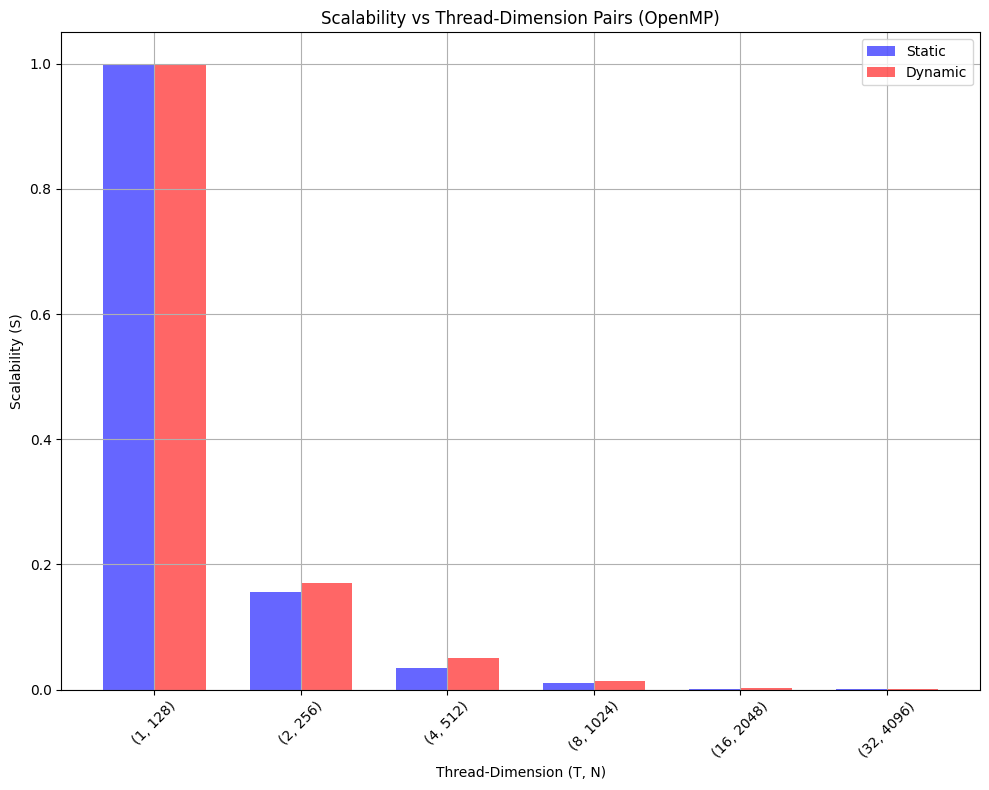

In [ ]:
# Plotting weak scalability vs number of threads for static and dynamic executions

# Define thread values to test
thread_values = [1, 2, 4, 8, 16, 32]
# Base matrix size
base_size = 128

# Lists to store scalability results
scalability_results_static = []
scalability_results_dynamic = []

# Test each thread value
for T in thread_values:
    N_scaled = base_size * T  # Scale matrix size proportionally to the number of threads
    result_static = results_static_OMP[(results_static_OMP['N'] == N_scaled) & (results_static_OMP['T'] == T)]
    result_dynamic = results_dynamic_OMP[(results_dynamic_OMP['N'] == N_scaled) & (results_dynamic_OMP['T'] == T)]

    if not result_static.empty and not result_dynamic.empty:
        T1_static_time = results_static_OMP[(results_static_OMP['N'] == base_size) & (results_static_OMP['T'] == 1)]['time'].values[0]
        T1_dynamic_time = results_dynamic_OMP[(results_dynamic_OMP['N'] == base_size) & (results_dynamic_OMP['T'] == 1)]['time'].values[0]

        scalability_static = T1_static_time / result_static['time'].values[0]
        scalability_dynamic = T1_dynamic_time / result_dynamic['time'].values[0]

        scalability_results_static.append((T, N_scaled, scalability_static))
        scalability_results_dynamic.append((T, N_scaled, scalability_dynamic))

# Extract thread-dimension pairs and scalability values for static and dynamic execution
static_pairs = [f'({T}, {N})' for T, N, S in scalability_results_static]
static_scalability = [S for T, N, S in scalability_results_static]
dynamic_pairs = [f'({T}, {N})' for T, N, S in scalability_results_dynamic]
dynamic_scalability = [S for T, N, S in scalability_results_dynamic]

# Set up the plot
plt.figure(figsize=(10, 8))

# Define the width of each bar and the positions on the x-axis
bar_width = 0.35
index = np.arange(len(static_pairs))

# Plot bars for static scalability
plt.bar(index - bar_width/2, static_scalability, bar_width, color='blue', alpha=0.6, label='Static')

# Plot bars for dynamic scalability
plt.bar(index + bar_width/2, dynamic_scalability, bar_width, color='red', alpha=0.6, label='Dynamic')

plt.xlabel('Thread-Dimension (T, N)')
plt.ylabel('Scalability (S)')
plt.title('Scalability vs Thread-Dimension Pairs (OpenMP)')
plt.xticks(index, static_pairs, rotation=45)  # Set x-ticks to be the thread-dimension pairs
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()
